In [173]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
heart = pd.read_csv('heart.csv')
heart.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


### Check the null values

In [35]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Describe the data

In [36]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## EDA (Exploratory Data Analysis)

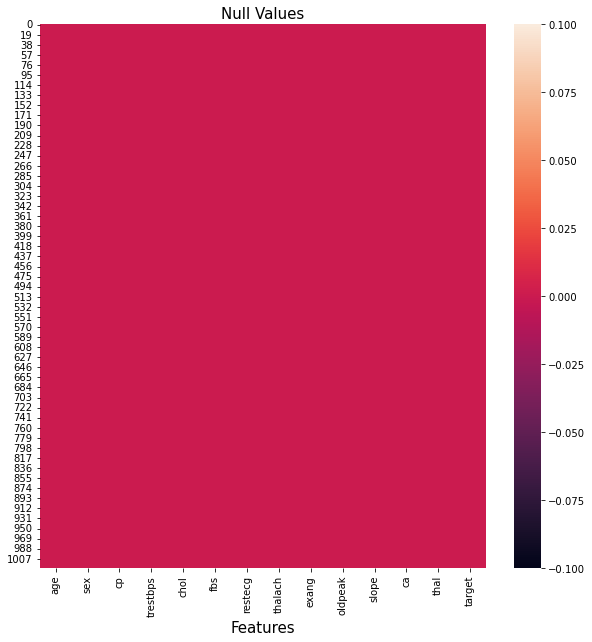

In [112]:
plt.figure(figsize = (10,10))
sns.heatmap(heart.isnull())
plt.title('Null Values', fontsize = 15)
plt.xlabel('Features', fontsize  = 15)
plt.show()

### Total number of disease and no disease samples

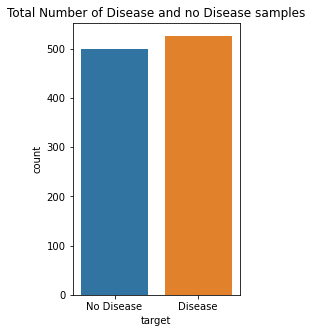

In [89]:
target_col = pd.DataFrame(heart.target, columns = ['target'])
target_col.target.replace([0,1],['No Disease', 'Disease'], inplace = True)

plt.figure(figsize = (3,5))
sns.countplot(x = 'target', data = target_col)
plt.title('Total Number of Disease and no Disease samples')
plt.show()

C:\Users\AR Ashar\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


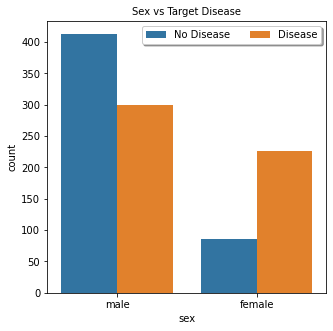

In [101]:
plt.figure(figsize = (5,5))
sex_target_cols = heart[['sex','target']]
sex_target_cols.sex.replace([1,0], ['male','female'], inplace = True)
sex_target_cols.target.replace([1,0], ['Disease','No Disease'], inplace = True)

sns.countplot(x = 'sex', hue = 'target', data = sex_target_cols)
plt.title('Sex vs Target Disease', fontsize = 10)
plt.legend(loc = 'upper right', shadow = True, ncol=2, prop = {'size': 10})
plt.show()

### Age vs Target 

C:\Users\AR Ashar\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


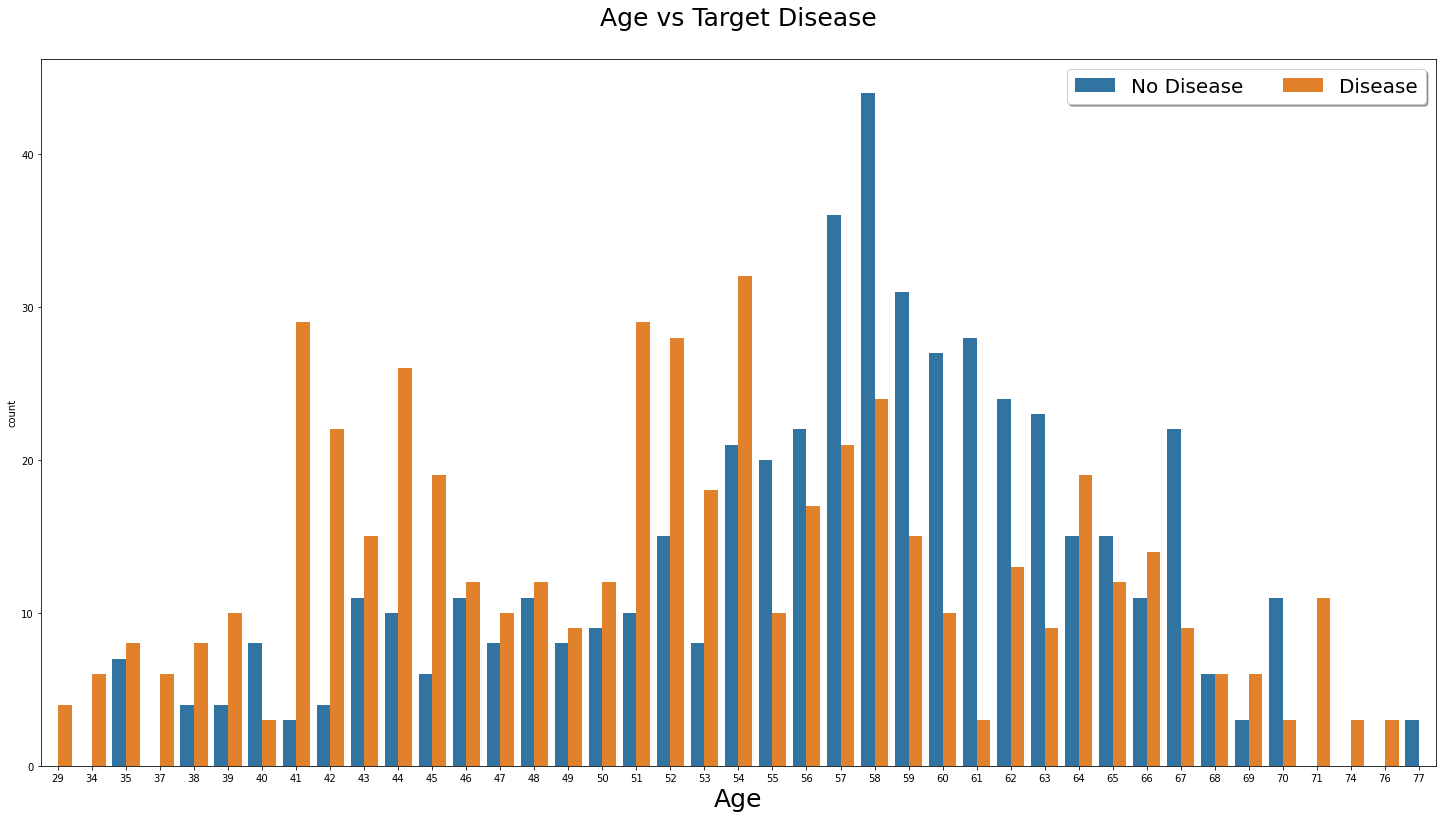

In [107]:
age_target_cols = heart[['age','target']]
age_target_cols.target.replace([1,0], ['Disease','No Disease'], inplace = True)

plt.figure(figsize = (25,13))
sns.countplot(x = 'age', hue = 'target', data = age_target_cols)
plt.title('Age vs Target Disease\n', fontsize = 25)
plt.xlabel('Age', fontsize = 25)
plt.legend(loc = 'upper right', shadow = True, ncol=2, prop = {'size': 20})
plt.show()

### chest pain vs target 

C:\Users\AR Ashar\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


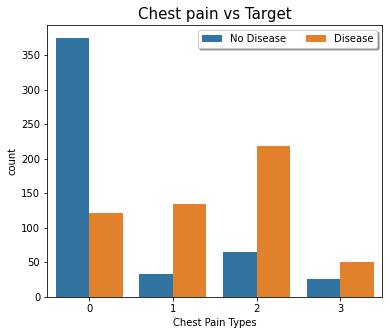

In [108]:
chest_target_cols = heart[['cp', 'target']]
chest_target_cols.target.replace([1,0], ['Disease','No Disease'], inplace = True)

plt.figure(figsize = (6,5))
sns.countplot(x = 'cp', hue = 'target', data = chest_target_cols)
plt.title('Chest pain vs Target', fontsize = 15)
plt.xlabel('Chest Pain Types', fontsize = 10)
plt.legend(loc = 'upper right', shadow = True, ncol=2, prop = {'size': 10})
plt.show()

C:\Users\AR Ashar\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


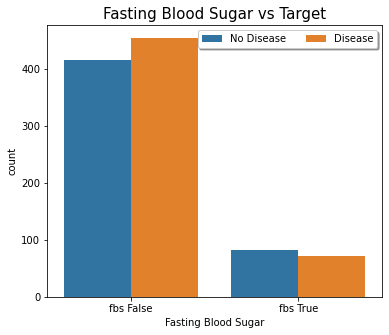

In [117]:
fbs_target_cols = heart[['fbs', 'target']]
fbs_target_cols.fbs.replace([1,0], ['fbs True','fbs False'], inplace = True)
fbs_target_cols.target.replace([1,0], ['Disease','No Disease'], inplace = True)

plt.figure(figsize = (6,5))
sns.countplot(x = 'fbs', hue = 'target', data = fbs_target_cols)
plt.title('Fasting Blood Sugar vs Target', fontsize = 15)
plt.legend(loc = 'upper right', shadow = True, ncol=2, prop = {'size': 10})
plt.xlabel('Fasting Blood Sugar')
plt.show()

C:\Users\AR Ashar\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


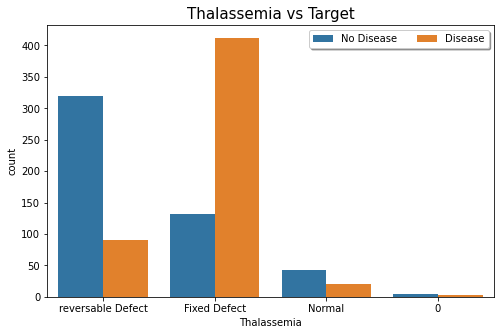

In [118]:
thal_target_cols = heart[['thal', 'target']]
thal_target_cols.thal.replace([1,2,3], ['Normal','Fixed Defect', 'reversable Defect'], inplace = True)
thal_target_cols.target.replace([1,0], ['Disease','No Disease'], inplace = True)

plt.figure(figsize = (8,5))
sns.countplot(x = 'thal', hue = 'target', data = thal_target_cols)
plt.title('Thalassemia vs Target', fontsize = 15)
plt.legend(loc = 'upper right', shadow = True, ncol=2, prop = {'size': 10})
plt.xlabel('Thalassemia')
plt.show()

C:\Users\AR Ashar\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


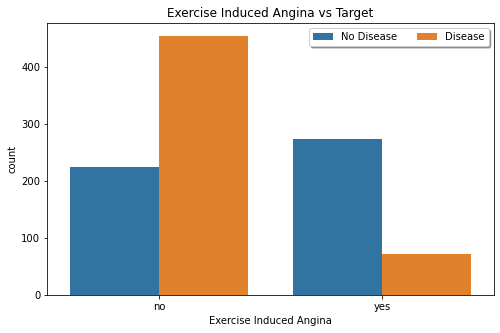

In [121]:
exang_target_cols = heart[['exang', 'target']]
exang_target_cols.exang.replace([1,0], ['yes','no'], inplace = True)
exang_target_cols.target.replace([1,0], ['Disease','No Disease'], inplace = True)

plt.figure(figsize = (8,5))
sns.countplot(x = 'exang', hue = 'target', data = exang_target_cols)
plt.title('Exercise Induced Angina vs Target')
plt.xlabel('Exercise Induced Angina')
plt.legend(loc = 'upper right', shadow = True, ncol=2, prop = {'size': 10})
plt.show()

## Split the data into training and testing sets

In [136]:
X = heart.iloc[:,0:13]
Y = heart.target

In [137]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = .1)

In [139]:
print(f"""Shape of X train: {x_train.shape}
Shape of y train: {y_train.shape}
Shape of X test: {x_test.shape}
Shape of y test: {y_test.shape}""")

Shape of X train: (922, 13)
Shape of y train: (922,)
Shape of X test: (103, 13)
Shape of y test: (103,)


## Random forest

In [164]:
rf = RandomForestClassifier(n_estimators = 5)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [174]:
pred = rf.predict(x_test)

In [172]:
rf_score = rf.score(x_test, y_test)
print('Accuracy:', int(np.round(rf_score,2)*100), '%')

Accuracy: 100 %


## Confusion Matrix

In [207]:
cm = confusion_matrix(y_test,pred)

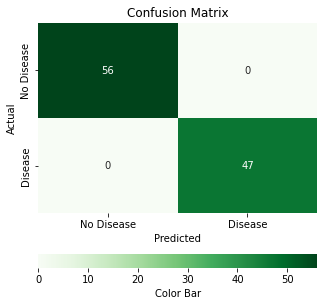

In [214]:
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True, 
            cmap = 'Greens',
            cbar_kws = {'label' : 'Color Bar', 'orientation':'horizontal'},
            xticklabels = ['No Disease','Disease'], 
            yticklabels = ['No Disease','Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()